In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

from chebGreen.utils import runCustomScript, computeEmpiricalError
from chebGreen.greenlearning.utils import DataProcessor
from pathlib import Path
import shutil, time

Theta = [1,5,10]
theta_ = 7
domain = [0,1,0,1]
generateData = True
script = "generate_example"
example = "airy_equation"
dirichletBC = True

model = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Ginterp, Ninterp = model.generateNewModel(theta_)

validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

# Compute error for paper
Nsample = 100
lmbda = 0.01
Nf = 500
Nu = 500
noise_level = 0.1
seed = 42
saveSuffix = "validation"

Generating dataset for example 'airy_equation'
Dataset found for Theta = 1.00. Skipping dataset generation.
Dataset found for Theta = 5.00. Skipping dataset generation.
Dataset found for Theta = 10.00. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'airy_equation' at Theta = 1.00
Learning a chebfun model for example 'airy_equation' at Theta = 1.00
Chebfun model added for example 'airy_equation' at Theta = 1.00

Found saved model, Loading model for example 'airy_equation' at Theta = 5.00
Learning a chebfun model for example 'airy_equation' at Theta = 5.00
Chebfun model added for example 'airy_equation' at Theta = 5.00

Found saved model, Loading model for example 'airy_equation' at Theta = 10.00
Learning a chebfun model for example 'airy_equation' at Theta = 10.00
Chebfun model added for example 'airy_equation' at Theta = 10.00

Generating dataset for e

In [2]:
datapath = f"datasets/{example}-{saveSuffix}/{theta_:.2f}.mat"

In [3]:
data = DataProcessor(datapath)
data.generateDataset(trainRatio = 0)

In [4]:
i = 95
data.valDataset = ((data.valDataset[0])[i:i+1,:], (data.valDataset[1])[i:i+1,:])

In [5]:
theta = 10

In [6]:
error, uc, u0, f0 = model.computeEmpiricalError(theta, data)

0


In [7]:
from chebGreen.chebpy2.chebpy.core.settings import ChebPreferences, _preferences

In [8]:
prefs = ChebPreferences()
prefs.eps = np.finfo(np.float32).eps

In [9]:
e = (u0-uc)

In [10]:
for fun in e:
    print('Before')
    fun.roots()
    print('After')

Before
Hello
Hello
Hello
After


/Users/hsharsh/continuousegf/main/chebGreen/chebpy2/chebpy/core/algorithms.py:141: RuntimeWarning: overflow encountered in multiply
  bk1 = ak[k - 1] + xx * bk2 - bk1


In [10]:
# _preferences.reset()

In [44]:
# (uc-u0).roots()

array([0.99345209, 0.99873766])

In [35]:
# u0.abs()

chebfun (5 smooth pieces)
       interval       length     endpoint values
[   1e-09,   0.078]      294  -6.1e-09   -2e-09
[   0.078,    0.95]      896   2.8e-10 -6.3e-10
[    0.95,    0.97]       84   1.3e-09  8.4e-10
[    0.97,    0.98]       49   3.3e-10    2e-10
[    0.98,       1]      143  -3.9e-10  9.3e-10
vertical scale = 0.2    total length = 1466

In [12]:
def roots(c):
    merge = c.prefs.mergeroots
    allrts = []
    prvrts = np.array([])
    htol = 1e2 * c.hscale * c.prefs.eps
    for fun in c:
        print('Hello')
        rts = fun.roots()
        print('Hello')
        rts = rts[~np.isnan(rts)]
        # ignore first root if equal to the last root of previous fun
        # TODO: there could be multiple roots at breakpoints
        print(prvrts)
        print(rts)
        if prvrts.size > 0 and rts.size > 0:
            if merge and abs(prvrts[-1] - rts[0]) <= htol:
                rts = rts[1:]
        # for i, rt in enumerate(rts):
        #     if 
        allrts.append(rts)
        prvrts = rts
    return np.concatenate([x for x in allrts])

In [13]:
roots(u0-uc)

Hello
Hello
[]
[0.99345209]


array([0.99345209])

In [57]:
r = roots(u0)

In [58]:
print(r[-1])

0.9999999999999584


In [54]:
roots(u0)

1.1920928955078125e-05


array([0.        , 0.97074419, 0.99999994, 1.        ])

In [41]:
def absolute(c):
        """Absolute value of a Chebfun"""
        newdom = c.domain.merge(roots(c))
        funs = [x.absolute() for x in c._break(newdom)]
        return c.__class__(funs)

In [42]:
absolute(u0-uc)

chebfun (2 smooth pieces)
       interval       length     endpoint values
[       0,    0.99]     1000   0.00034  2.1e-17
[    0.99,       1]      123   2.3e-08  0.00024
vertical scale = 0.092    total length = 1123

In [43]:
newdom = u0.domain.merge(roots(u0))

In [69]:
bndfuns = [x for x in u0._break(newdom)]

<Axes: >

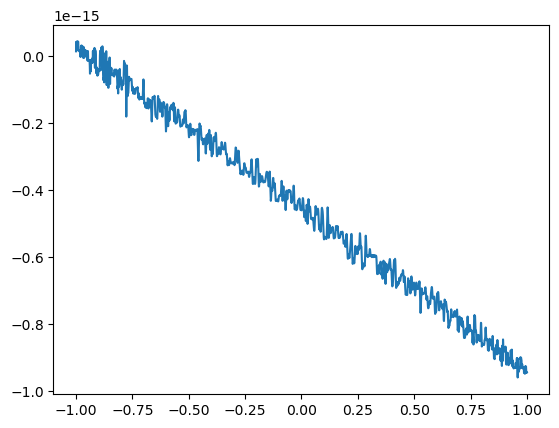

In [74]:
bndfuns[-1].onefun.plot()

<Axes: >

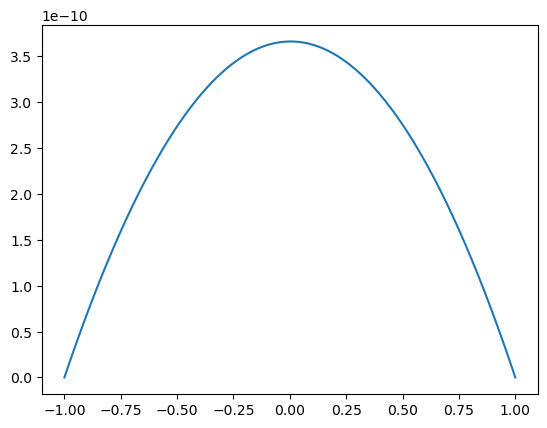

In [65]:
absolute(u0).funs[-2].onefun.plot()

1.1920928955078125e-05


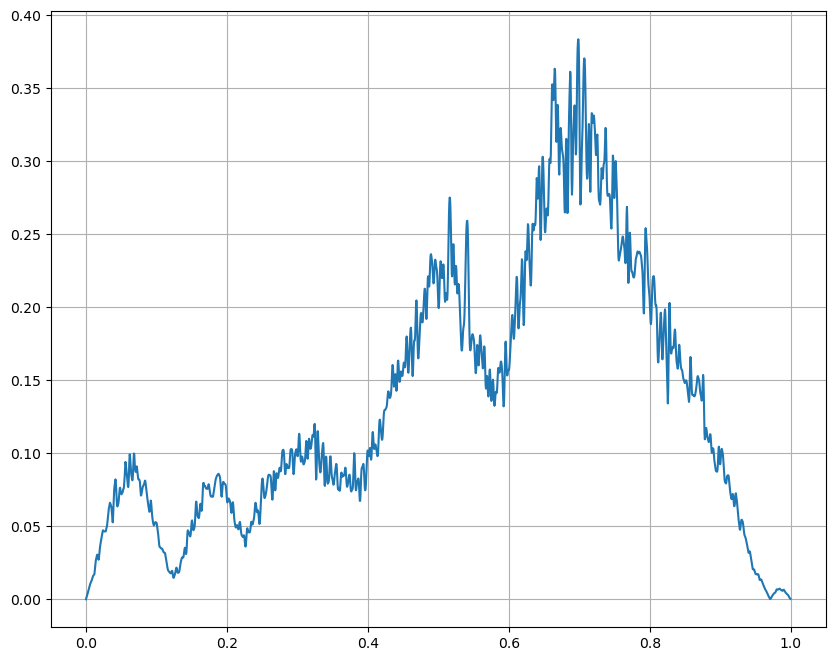

In [53]:
fig = plt.figure(figsize = (10,8))
absolute(u0).plot(fig = fig)
plt.grid('on')